In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib

In [3]:
rookie_df = pd.read_csv('roty_voting_data.csv')

In [4]:
rookie_df.head()

,age,ast_per_g,award_share,blk_per_g,fg3_pct,fg_pct,ft_pct,g,link,mp_per_g,...,points_max,points_won,pts_per_g,season,stl_per_g,team_id,trb_per_g,votes_first,ws,ws_per_48
0,23,4.5,0.955,0.6,0.406,0.474,0.836,82,/players/b/birdla01.html,36.0,...,66,63.0,21.3,1979-1980,1.7,BOS,10.4,63.0,11.2,0.182
1,20,7.3,0.045,0.5,0.226,0.530,0.810,77,/players/j/johnsma02.html,36.3,...,66,3.0,18.0,1979-1980,2.4,LAL,7.7,3.0,10.5,0.180
2,22,2.4,0.275,0.5,0.192,0.464,0.716,81,/players/g/griffda01.html,35.4,...,69,19.0,20.6,1980-1981,1.3,UTA,3.6,19.0,0.4,0.006
3,22,6.9,0.261,0.1,0.097,0.452,0.749,80,/players/r/ranseke01.html,30.4,...,69,18.0,15.2,1980-1981,1.1,POR,2.4,18.0,2.8,0.056
4,23,1.1,0.203,0.8,NaN,0.512,0.588,82,/players/s/smithla01.html,31.4,...,69,14.0,9.6,1980-1981,0.9,GSW,12.1,14.0,6.1,0.113


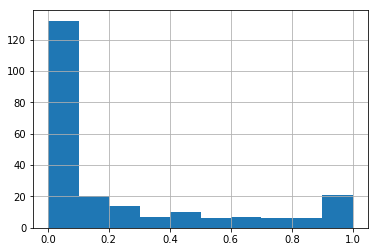

In [5]:
x = rookie_df['award_share']
x.hist(bins=10)
plt.show()

Most of the players in the dataset did not win the award. 

In [6]:
features = ['ast_per_g','blk_per_g', 'fg3_pct', 'fg_pct', 'mp_per_g', 'pts_per_g','stl_per_g',
           'ws','ws_per_48']

In [7]:
corr_matrix = rookie_df[features + ['award_share']].corr()
corr_matrix['award_share'].sort_values(ascending=False)

award_share    1.000000
pts_per_g      0.597627
mp_per_g       0.511728
ws             0.488326
ast_per_g      0.349897
ws_per_48      0.245834
stl_per_g      0.243657
blk_per_g      0.177289
fg_pct         0.049712
fg3_pct       -0.073358
Name: award_share, dtype: float64

In [8]:
import seaborn as sns

In [9]:
fig = plt.figure(figsize=(14, 14))

fig.set_facecolor('white')

data = rookie_df[features + ['award_share']]

sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")
_ = plt.yticks(rotation='horizontal')

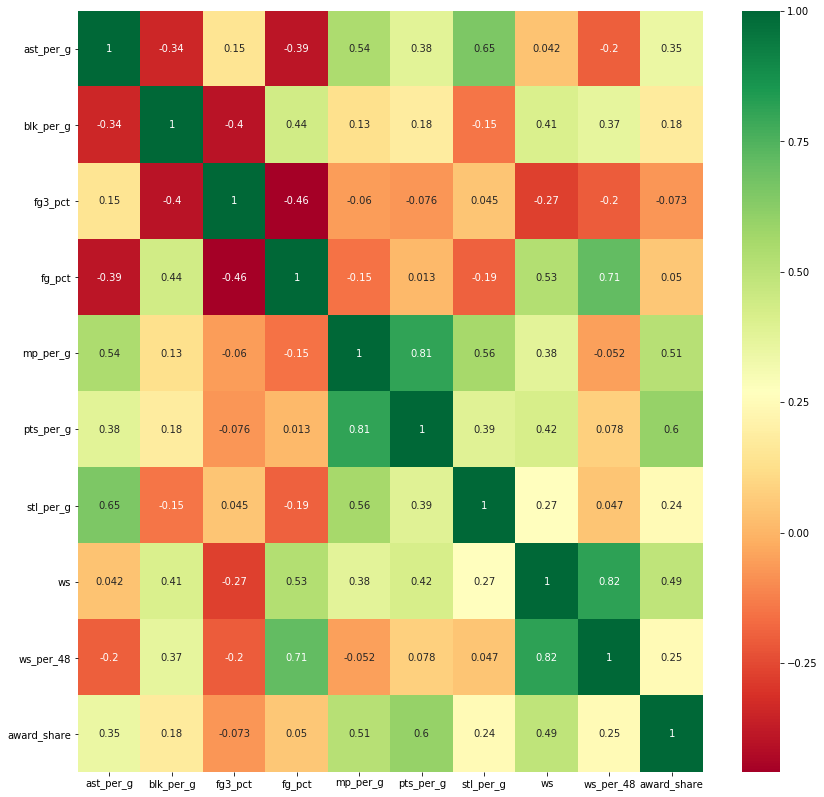

In [10]:
plt.show()

In [11]:
rookie_df.season.unique()

array(['1979-1980', '1980-1981', '1981-1982', '1982-1983', '1983-1984',
       '1984-1985', '1985-1986', '1986-1987', '1987-1988', '1988-1989',
       '1989-1990', '1990-1991', '1991-1992', '1992-1993', '1993-1994',
       '1994-1995', '1995-1996', '1996-1997', '1997-1998', '1998-1999',
       '1999-2000', '2000-2001', '2001-2002', '2002-2003', '2003-2004',
       '2004-2005', '2005-2006', '2006-2007', '2007-2008', '2008-2009',
       '2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014',
       '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019'],
      dtype=object)

In [12]:
data = data.fillna(0)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler().fit(data.values)
transformed = scaler.transform(data.values)

In [15]:
rookie_df[features + ['award_share']] = transformed

In [16]:
rookie_df.head()


,age,ast_per_g,award_share,blk_per_g,fg3_pct,fg_pct,ft_pct,g,link,mp_per_g,...,points_max,points_won,pts_per_g,season,stl_per_g,team_id,trb_per_g,votes_first,ws,ws_per_48
0,23,0.797897,2.240994,-0.177296,0.999083,0.179419,0.836,82,/players/b/birdla01.html,1.062061,...,66,63.0,1.662264,1979-1980,1.426857,BOS,10.4,63.0,2.711976,1.758156
1,20,2.145661,-0.586760,-0.310852,-0.195851,1.226696,0.810,77,/players/j/johnsma02.html,1.108977,...,66,3.0,0.971034,1979-1980,2.904410,LAL,7.7,3.0,2.443773,1.719275
2,22,-0.212927,0.127947,-0.310852,-0.421561,-0.007595,0.716,81,/players/g/griffda01.html,0.968229,...,69,19.0,1.515639,1980-1981,0.582541,UTA,3.6,19.0,-1.426008,-1.663414
3,22,1.953123,0.084443,-0.845074,-1.052220,-0.232011,0.749,80,/players/r/ranseke01.html,0.186298,...,69,18.0,0.384535,1980-1981,0.160383,POR,2.4,18.0,-0.506456,-0.691377
4,23,-0.838674,-0.095787,0.089815,-1.696157,0.890071,0.588,82,/players/s/smithla01.html,0.342684,...,69,14.0,-0.788462,1980-1981,-0.261775,GSW,12.1,14.0,0.757928,0.416745


Creating Linear Regression model 

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
train_data = rookie_df.loc[rookie_df.season != "2018-2019"]
validation_data = rookie_df.loc[rookie_df.season == "2018-2019"]
validation_data = validation_data.sort_values(by='award_share', ascending=False)

In [19]:
validation_data['player']

220                Luka Dončić
221                 Trae Young
222              Deandre Ayton
223              Jaren Jackson
224              Collin Sexton
225    Shai Gilgeous-Alexander
226              Marvin Bagley
227                Josh Okogie
228          Mitchell Robinson
Name: player, dtype: object

In [20]:
train_x = train_data[features]
train_y = train_data['award_share']

In [21]:
val_x = validation_data[features]
val_y = validation_data['award_share']

In [22]:
from sklearn.utils import shuffle
shuffle_x, shuffle_y = shuffle(train_x,train_y)

In [23]:
lr = LinearRegression()
lr.fit(shuffle_x,shuffle_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
predict_y = lr.predict(val_x)

In [25]:
sorted_indices = np.argsort(predict_y)[::-1]
correct_indices = np.arange(len(val_y))

accuracy = np.sum(sorted_indices[:5] == correct_indices[:5]) / len(correct_indices[:5])

In [26]:
accuracy

0.8

In [27]:
predictions = predict_y[sorted_indices]

In [28]:
sorted_indices

array([0, 1, 2, 6, 4, 3, 5, 8, 7], dtype=int64)

In [29]:
predictions

array([ 1.3172266 ,  1.31425272,  0.14602597,  0.0250225 , -0.16901092,
       -0.26946556, -0.39346203, -0.71086336, -1.12134063])

In [30]:
print("My Linear Regression Predictions: ")
for i in range(len(validation_data)):
    print(f"{i+1}. {validation_data.iloc[sorted_indices[i]].player}: {predictions[i]}")

My Linear Regression Predictions: 
1. Luka Dončić: 1.3172266023678776
2. Trae Young: 1.3142527154987045
3. Deandre Ayton: 0.14602597025557554
4. Marvin Bagley: 0.02502250371378927
5. Collin Sexton: -0.16901091988033648
6. Jaren Jackson: -0.26946555937733496
7. Shai Gilgeous-Alexander: -0.3934620293301084
8. Mitchell Robinson: -0.7108633552309146
9. Josh Okogie: -1.1213406343840322


Actually order below

In [31]:
validation_data['player']

220                Luka Dončić
221                 Trae Young
222              Deandre Ayton
223              Jaren Jackson
224              Collin Sexton
225    Shai Gilgeous-Alexander
226              Marvin Bagley
227                Josh Okogie
228          Mitchell Robinson
Name: player, dtype: object

Top 3 players were predicted correctly with the rest of the order being mixed. However, this model was able to predict that Luka Doncic would go on to win the rookie of the year title which was correct!

In [32]:
from sklearn.linear_model import SGDRegressor
#[0.1, 0.01, 0.001, 0.0001]
sgd_reg = SGDRegressor(penalty=None,eta0=0.01)
sgd_reg.fit(shuffle_x,shuffle_y)

C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [33]:
sgd_reg_predict_y = sgd_reg.predict(val_x)

In [34]:
sorted_indices = np.argsort(sgd_reg_predict_y)[::-1]
correct_indices = np.arange(len(val_y))

accuracy = np.sum(sorted_indices[:5] == correct_indices[:5]) / len(correct_indices[:5])

In [35]:
print(f'{accuracy:.4f}')

0.6000


In [36]:
sgd_predictions = sgd_reg_predict_y[sorted_indices]

In [37]:
sgd_predictions = sgd_reg_predict_y[sorted_indices]
print("My Gradient Decent Regressor Predictions: ")
for i in range(len(validation_data)):
    print(f"{i+1}. {validation_data.iloc[sorted_indices[i]].player}: {sgd_predictions[i]}")

My Gradient Decent Regressor Predictions: 
1. Luka Dončić: 0.9183083700726441
2. Trae Young: 0.7618129868384403
3. Deandre Ayton: 0.2435322063270552
4. Marvin Bagley: -0.04525399069480741
5. Jaren Jackson: -0.16701406265629157
6. Collin Sexton: -0.22885821754067284
7. Shai Gilgeous-Alexander: -0.32936699945218384
8. Mitchell Robinson: -0.39110428602672676
9. Josh Okogie: -0.9793383417950914


In [38]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 10, solver='cholesky')
ridge_reg.fit(shuffle_x,shuffle_y)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [39]:
ridge_reg_predict_y = ridge_reg.predict(val_x)
sorted_indices = np.argsort(ridge_reg_predict_y)[::-1]
correct_indices = np.arange(len(val_y))

accuracy = np.sum(sorted_indices[:5] == correct_indices[:5]) / len(correct_indices[:5])

In [40]:
print(f'{accuracy:.4f}')

0.8000


In [41]:
ridge_predictions = ridge_reg_predict_y[sorted_indices]

In [42]:
ridge_predictions = ridge_reg_predict_y[sorted_indices]
print("My Ridge Regression Predictions: ")
for i in range(len(validation_data)):
    print(f"{i+1}. {validation_data.iloc[sorted_indices[i]].player}: {ridge_predictions[i]}")

My Ridge Regression Predictions: 
1. Luka Dončić: 1.1846871382320967
2. Trae Young: 1.1415331373365267
3. Deandre Ayton: 0.17050939331969986
4. Marvin Bagley: 0.004948233744098831
5. Collin Sexton: -0.17620085922724377
6. Jaren Jackson: -0.23872805728516275
7. Shai Gilgeous-Alexander: -0.37628186326949215
8. Mitchell Robinson: -0.6002414286025302
9. Josh Okogie: -1.0760855336175512


In [43]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(shuffle_x,shuffle_y)
lasso_reg_predict_y = lasso_reg.predict(val_x)
sorted_indices = np.argsort(lasso_reg_predict_y)[::-1]
correct_indices = np.arange(len(val_y))

print(f'{accuracy:.4f}')

accuracy = np.sum(sorted_indices[:5] == correct_indices[:5]) / len(correct_indices[:5])
lasso_predictions = lasso_reg_predict_y[sorted_indices]
lasso_predictions = lasso_reg_predict_y[sorted_indices]
print("My Lasso Regression Predictions: ")
for i in range(len(validation_data)):
    print(f"{i+1}. {validation_data.iloc[sorted_indices[i]].player}: {lasso_predictions[i]}")

0.8000
My Lasso Regression Predictions: 
1. Luka Dončić: 0.7898419783243934
2. Trae Young: 0.5727314421130184
3. Deandre Ayton: 0.33379245356791054
4. Marvin Bagley: -0.0007620002704199231
5. Jaren Jackson: -0.10633815435574598
6. Collin Sexton: -0.16181020154060957
7. Shai Gilgeous-Alexander: -0.24364823485794943
8. Mitchell Robinson: -0.36397373846007647
9. Josh Okogie: -0.7491520454592147


In [44]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(shuffle_x,shuffle_y)
elastic_net_predict_y = elastic_net.predict(val_x)
sorted_indices = np.argsort(elastic_net_predict_y)[::-1]
correct_indices = np.arange(len(val_y))

print(f'{accuracy:.4f}')

accuracy = np.sum(sorted_indices[:5] == correct_indices[:5]) / len(correct_indices[:5])
elastic_net_predictions = elastic_net_predict_y[sorted_indices]
elastic_net_predictions = elastic_net_predict_y[sorted_indices]
print("My Elastic Net Predictions: ")
for i in range(len(validation_data)):
    print(f"{i+1}. {validation_data.iloc[sorted_indices[i]].player}: {elastic_net_predictions[i]}")

0.6000
My Elastic Net Predictions: 
1. Luka Dončić: 0.8806623204284968
2. Trae Young: 0.7050437516908186
3. Deandre Ayton: 0.33493963854991865
4. Marvin Bagley: -0.03461823476288721
5. Jaren Jackson: -0.15181705692100078
6. Collin Sexton: -0.20593610916628743
7. Shai Gilgeous-Alexander: -0.2521451553902113
8. Mitchell Robinson: -0.37367821336942303
9. Josh Okogie: -0.8442674668727737


In [48]:
classifiers = [lr,sgd_reg,ridge_reg,lasso_reg,elastic_net]
model_names = ['Linear_Regression', 'Gradient_Descent', 'Ridge_Regression', 'Lasso_Regression','Elastic_Net']

for i in range(len(classifiers)):
    joblib.dump(classifiers[i], f'{model_names[i]}.joblib')